Time series analysis is a statistical technique used to analyze and interpret data that is collected over time. It involves studying the patterns, trends, and behaviors within the data to make predictions or gain insights. Time series data consists of a sequence of observations or measurements taken at different time intervals.

Time Series Components: Time series data typically exhibits four main components:

Trend: The long-term upward or downward movement of the data.
Seasonality: Regular and predictable patterns that occur at fixed intervals.
Cyclical variations: Patterns that occur over a longer period, but are not as regular as seasonality.
Random or residual fluctuations: Unpredictable variations that cannot be explained by the other component

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data


An ARIMA model is a class of statistical models for analyzing and forecasting time series data.

It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.
d: The number of times that the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also called the order of moving average.
A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.

A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

Adopting an ARIMA model for a time series assumes that the underlying process that generated the observations is an ARIMA process. This may seem obvious, but helps to motivate the need to confirm the assumptions of the model in the raw observations and in the residual errors of forecasts from the model.


In [59]:
import pandas as pd
import numpy as np 
import yfinance as yf
import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
import pandas_datareader as pdr
import warnings
warnings.filterwarnings('ignore')
plt.style.use('tableau-colorblind10')

In [2]:
# Collected data through yfinace api and using adj close price for adanigreen stock
adani = yf.download('ADANIGREEN.NS',start='2022-03-31')['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [70]:
#converting it to pandas data frame
adani = pd.DataFrame(adani)


<Axes: xlabel='Date'>

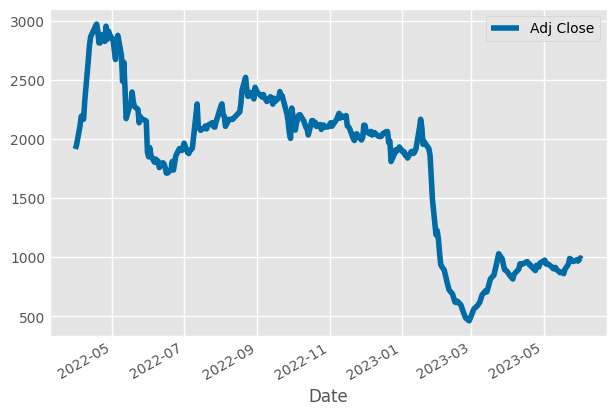

In [73]:
# Adani price trends
adani.plot()

In [72]:
# Stationarity test 
result = adfuller(adani)
print('ADF statistics :',result[0])
print('P-value :',result[1])
print('Critiacal Value :',result[4])

ADF statistics : -1.139052653053018
P-value : 0.6992496626776481
Critiacal Value : {'1%': -3.4534232986669546, '5%': -2.8716994185534745, '10%': -2.5721833625116144}


Logarithmic transformations can help normalize the data distribution. Stock prices tend to have positive skewness, meaning they have a longer tail on the positive side. By taking the logarithm of prices or returns, the distribution can become more symmetrical and closer to a normal distribution. This can be useful for applying statistical techniques that assume normality.

In [23]:
# Adani price on log scale
adani_log = np.log(adani)
px.line(adani_log)

In [7]:
# tell number of diffrencing nedeed for making the data stationarity 
from pmdarima.arima.utils import ndiffs

In [10]:
ndiffs(adani,test = 'adf')

1

In [11]:
# making data statinory through diffrencing 
ab = adani.diff().dropna()


A time series Y_t (t=1,2...) is said to be stationary (in the weak sense) if its statistical properties do not vary with time (expectation, variance, autocorrelation). The white noise is an example of a stationary time series, with for example the case where Y_t follows a normal distribution N(mu, sigma^2) independent of t.

Identifying that a series is not stationary allows to afterwards study where the non-stationarity comes from. A non-stationary series can, for example, be stationary in difference (also called integrated of order 1): Y_t is not stationary, but the Y_t - Y_{t-1} difference is stationary. It is the case of the random walk. A series can also be stationary in trend.

Stationarity tests allow verifying whether a series is stationary or not. There are two different approaches: stationarity tests such as the KPSS test that consider as null hypothesis H0 that the series is stationary, and unit root tests, such as the Dickey-Fuller test and its augmented version, the augmented Dickey-Fuller test (ADF), or the Phillips-Perron test (PP), for which the null hypothesis is on the contrary that the series possesses a unit root and hence is not stationary. XLSTAT includes as of today 4 unit root tests: the Dickey-Fuller test, the ADF test, the PP test and the KPSS stationarity test.


WE ARE USING Dicky-Fuller test 


In [12]:
# statinory test after diffrencing
result = adfuller(adani.diff().dropna())
print('ADF statistics :',result[0])
print('P-value :',result[1])
print('Critiacal Value :',result[4])

ADF statistics : -6.903154471725382
P-value : 1.266813918101792e-09
Critiacal Value : {'1%': -3.4534232986669546, '5%': -2.8716994185534745, '10%': -2.5721833625116144}


In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

Transformations such as logarithms can help to stabilise the variance of a time series. Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

As well as looking at the time plot of the data, the ACF plot is also useful for identifying non-stationary time series. For a stationary time series, the ACF will drop to zero relatively quickly, while the ACF of non-stationary data decreases slowly. Also, for non-stationary data, the value of  
r
1
  is often large and positive

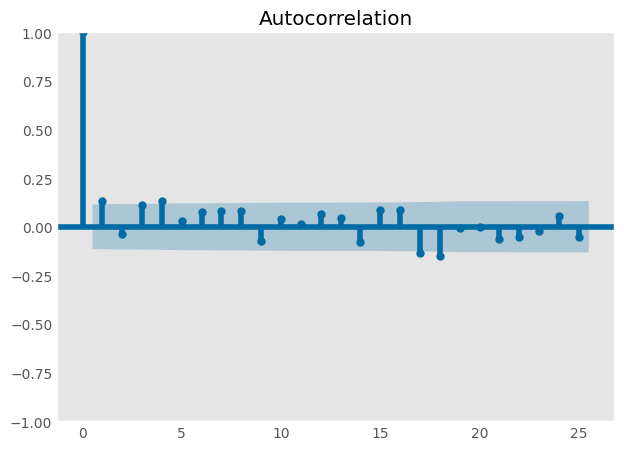

In [35]:
# it tell us about the order of MA -Moving average part of arima which q
acf = plot_acf(adani.diff().dropna())
plt.grid()

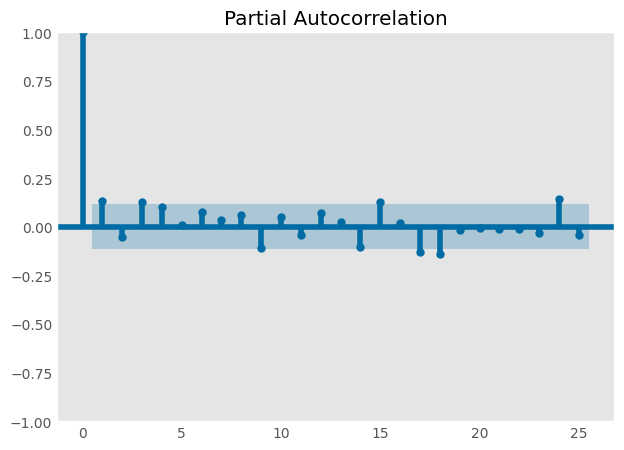

In [36]:
# it tell us about the auto reg part of the arima p 
pacf = plot_pacf(adani.diff().dropna())
plt.grid()

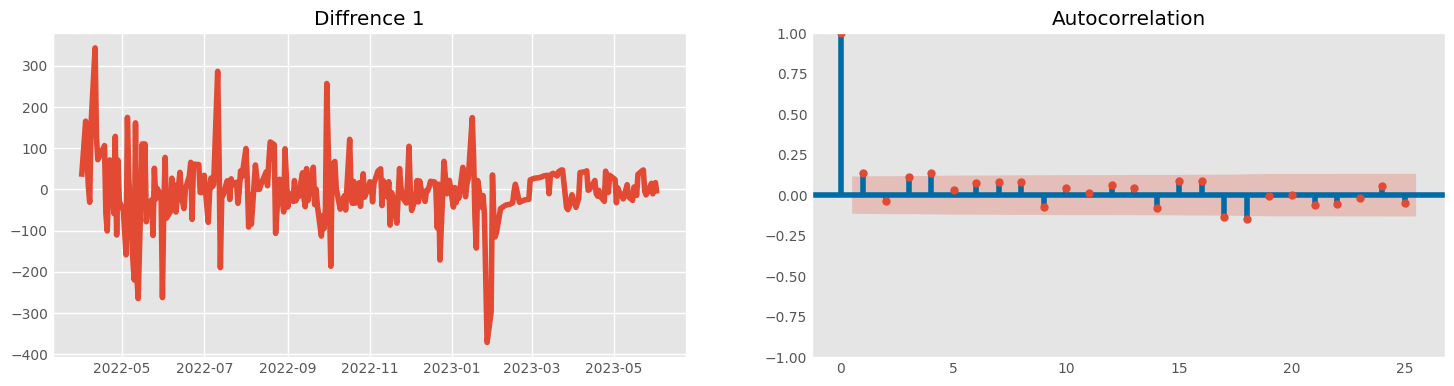

In [33]:
# after diffrencing particail auto corealtion 
fig,(ax1,ax2) =plt.subplots(1,2,figsize =(16,4))
ax1.plot(adani.diff().dropna())
ax1.set_title('Diffrence 1')
plot_acf(adani.diff().dropna(),ax=ax2);
plt.grid()
plt.style.use('tableau-colorblind10')

we have created 3 models and we will chose best fit model by reading there statistics 

In [69]:
from statsmodels.tsa.arima.model import ARIMA

In [60]:
model1 = ARIMA(adani,order =(1,1,1)).fit()

In [61]:
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  291
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1658.343
Date:                Sun, 04 Jun 2023   AIC                           3322.686
Time:                        09:23:30   BIC                           3333.696
Sample:                             0   HQIC                          3327.097
                                - 291                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2865      0.242     -1.184      0.236      -0.761       0.188
ma.L1          0.4376      0.233      1.880      0.060      -0.019       0.894
sigma2      5425.1846    244.848     22.157      0.0

In [41]:
start_date =adani.index[1]
end_date = adani.index[-1]
print(start_date,'\n',end_date)


2022-04-01 00:00:00 
 2023-06-02 00:00:00


In [51]:
pred = model1.predict(start=start_date,end =end_date)
residuals  = adani["Adj Close"]-pred

In [75]:
# statinory for residusl tell about the model 
resu = adfuller(residuals.dropna())
print('ADF statistics :',resu[0])
print('P-value :',resu[1])
print('Critiacal Value :',resu[4])

ADF statistics : -7.027414900182652
P-value : 6.31191731880163e-10
Critiacal Value : {'1%': -3.4534232986669546, '5%': -2.8716994185534745, '10%': -2.5721833625116144}


In [52]:
ab= adani.merge(pred,on ='Date')
px.line(ab)

In [53]:
px.line(residuals)

In [62]:
model1.forecast(steps = 10)

291    981.450340
292    982.051939
293    981.879566
294    981.928955
295    981.914804
296    981.918859
297    981.917697
298    981.918030
299    981.917934
300    981.917962
Name: predicted_mean, dtype: float64

In [63]:
model2 = ARIMA(adani,order =(1,1,0)).fit()

In [56]:
print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  291
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1659.208
Date:                Sun, 04 Jun 2023   AIC                           3322.416
Time:                        09:20:59   BIC                           3329.756
Sample:                             0   HQIC                          3325.357
                                - 291                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1358      0.033      4.134      0.000       0.071       0.200
sigma2      5474.1989    243.114     22.517      0.000    4997.704    5950.693
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [64]:
pred2 = model2.predict(start=start_date,end =end_date)
residuals2  = adani["Adj Close"]-pred2

In [65]:
cb= adani.merge(pred2,on ='Date')
px.line(cb)

In [67]:
px.line(residuals2)

In [68]:
model3 =  ARIMA(adani,order =(0,1,1)).fit()

In [69]:
print(model3.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  291
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1658.857
Date:                Sun, 04 Jun 2023   AIC                           3321.714
Time:                        09:28:28   BIC                           3329.054
Sample:                             0   HQIC                          3324.655
                                - 291                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1552      0.033      4.766      0.000       0.091       0.219
sigma2      5444.9802    242.586     22.446      0.000    4969.520    5920.441
Ljung-Box (L1) (Q):                   0.03   Jarque-